In [2]:
import os
os.chdir("../")

In [3]:
import matplotlib.pyplot as plt

from my_utils.markov_process import MP, MRP, MDP
from my_utils.policy import RandPolicy, DetPolicy

from my_utils.frog_mdp import FrogMDP, f, generate_transitions_rewards, get_frog_mdp

from my_utils.td import TD, GetValueTD

In [4]:
n = 10
mdp, a_policy = get_frog_mdp(n)

alphas = [0.05, 0.15, 0.3, 0.5]

defaultdict(<class 'int'>, {1: 0.3737599238772037, 2: 0.4279240484414058, 3: 0.43978584889026795, 4: 0.447410685361857, 5: 0.45047843078580835, 6: 0.45273073795487584, 7: 0.457741686206049, 8: 0.4704427822110173, 0: 0, 9: 0.5346403646360361, 10: 0})
defaultdict(<class 'int'>, {1: 0.37322250549225006, 2: 0.4205030552261427, 3: 0.4283812193633021, 4: 0.43690098275834194, 5: 0.43992317078469234, 6: 0.44534598113994134, 7: 0.4560454444701757, 8: 0.46603591646927417, 9: 0.5174390838152921, 10: 0, 0: 0})
defaultdict(<class 'int'>, {1: 0.2512645892563822, 2: 0.34686910258013526, 3: 0.36234437092602345, 4: 0.3659269494686129, 5: 0.3706472081783511, 6: 0.3756833246489799, 7: 0.3843818235109264, 8: 0.40114506978651937, 9: 0.5986438616946326, 10: 0, 0: 0})
defaultdict(<class 'int'>, {1: 0.27153404636142936, 2: 0.28325822679350876, 3: 0.3006977265167378, 4: 0.302011824478678, 5: 0.30327284695261153, 6: 0.30763879245488407, 7: 0.31044327501703894, 8: 0.3147458832130591, 9: 0.3887323644474428, 10: 0

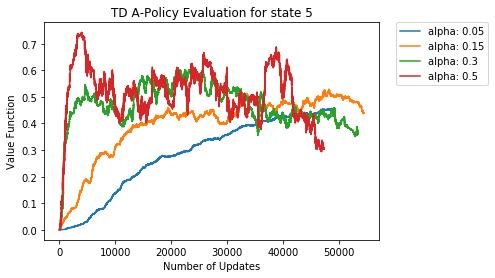

In [10]:
for alpha in alphas:
    rl = TD(a_policy, alpha, mdp.states, mdp.gamma)

    V, Vhisto= GetValueTD(mdp, rl, nIter=50)
    print(V)

    state = n//2
    plt.plot([i for i in range(len(Vhisto[state]))], Vhisto[state], label="alpha: {0:.2}".format(alpha))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Number of Updates')
plt.ylabel('Value Function')
plt.title('TD A-Policy Evaluation for state {0:.0f}'.format(state))
plt.show()